# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})


Dibuja un diagrama de dispersión (scatter plot) para los datos.

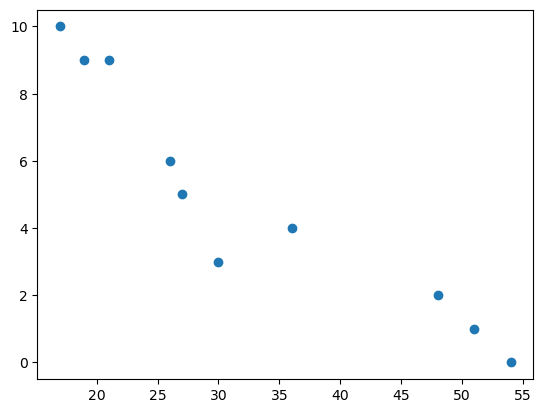

In [3]:
plt.scatter(student_data["Edad"], student_data["Retrasos"])

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Tiene una correlacion inversa

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [4]:
np.corrcoef(student_data["Edad"], student_data["Retrasos"])

np.cov(student_data["Edad"], student_data["Retrasos"])

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

Formula: Retrasos = 12.888803363135771 + -0.2428207709159809 * Edad


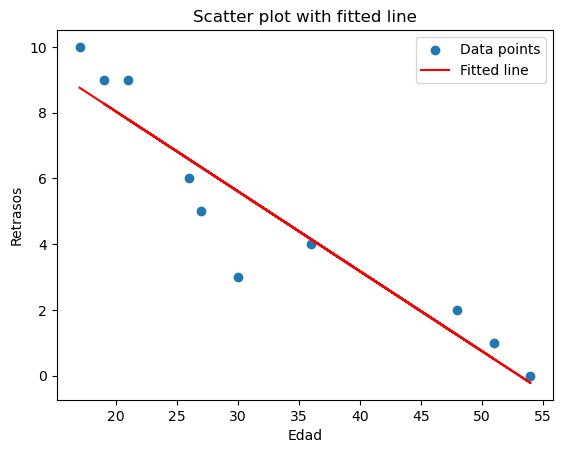

In [5]:
#Es regresion lineal

X = student_data[['Edad']]

X = student_data[['Edad']].values  # Convert to numpy array
y = student_data['Retrasos'].values  # Convert to numpy array

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the formula of the fitted line
intercept = model.intercept_
slope = model.coef_[0]
print(f"Formula: Retrasos = {intercept} + {slope} * Edad")

plt.scatter(X, y, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Fitted line')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.title('Scatter plot with fitted line')
plt.legend()
plt.show()

Grafica tu modelo de regresión en tu diagrama de dispersión.

In [8]:
import statsmodels.api as sm

# Calculate R^2
r_squared = model.score(X, y)
print(f"R^2: {r_squared}")

# Calculate p-value for the slope
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
ols_model = sm.OLS(y, X_with_const).fit()
p_value = ols_model.pvalues[1]  # p-value for the slope
print(f"P-value of the slope: {p_value}")

R^2: 0.8820265558250109
P-value of the slope: 5.56665383455342e-05


Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

Es un buen fit porque r2 es casi 1 y es significativo porque p-value es << 0.05

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [21]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")

In [31]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [22]:
# Identify categorical columns
categorical_cols = vehicles.select_dtypes(include=['object', 'category']).columns



In [23]:
categorical_cols

Index(['Make', 'Model', 'Transmission', 'Drivetrain', 'Vehicle Class',
       'Fuel Type'],
      dtype='object')

In [26]:
# I want to convert categorical to numerical and normalize them
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    vehicles[col] = le.fit_transform(vehicles[col])
    label_encoders[col] = le  # Save the encoder for each column

scaler = MinMaxScaler()
vehicles[categorical_cols] = scaler.fit_transform(vehicles[categorical_cols])

# Display the resulting dataframe
print(vehicles)

           Make     Model  Year  Engine Displacement  Cylinders  Transmission  \
0      0.000000  0.339063  1984                  2.5        4.0      0.681818   
1      0.000000  0.428334  1984                  4.2        6.0      0.681818   
2      0.000000  0.661769  1985                  2.5        4.0      0.681818   
3      0.000000  0.662046  1985                  4.2        6.0      0.681818   
4      0.007937  0.475464  1987                  3.8        6.0      0.704545   
...         ...       ...   ...                  ...        ...           ...   
35947  1.000000  0.995841  2013                  1.0        3.0      0.181818   
35948  1.000000  0.995841  2014                  1.0        3.0      0.181818   
35949  1.000000  0.995841  2015                  1.0        3.0      0.181818   
35950  1.000000  0.995841  2016                  0.9        3.0      0.204545   
35951  1.000000  0.995841  2016                  0.9        3.0      0.931818   

       Drivetrain  Vehicle 

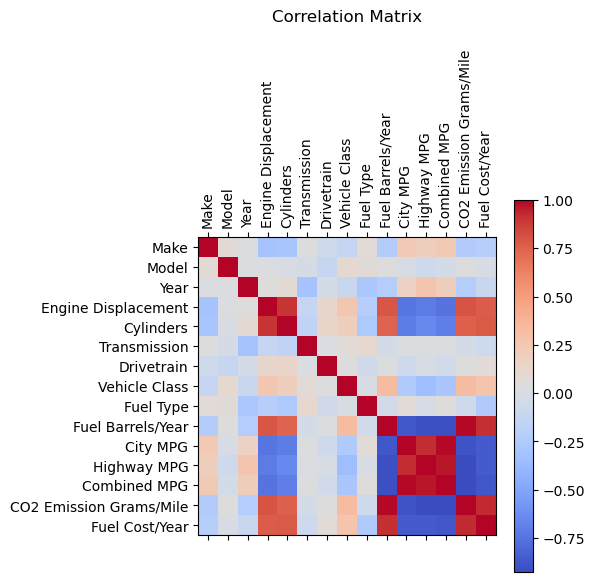

In [29]:
correlation_matrix = vehicles.corr()
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()

In [30]:
#I expect Engine DIsplacement, Cylinders, Fuel Type and Fuel cost to be the most important features

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [44]:
notarget = vehicles.drop(columns=['CO2 Emission Grams/Mile'])


X,y = notarget, vehicles['CO2 Emission Grams/Mile'] # Create X matrix and y vector from the dataset.

X = np.array(X, dtype=np.float64)

y = np.array(y, dtype=np.float64)

features = notarget.columns

print('feature names: {}'.format(notarget.columns))
print('Shape of data: {} {}'.format(X.shape, y.shape))

feature names: Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'Fuel Cost/Year'],
      dtype='object')
Shape of data: (35952, 14) (35952,)


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1)

print('Train and test sizes of X: {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes of y: {} {}'.format(y_train.shape, y_test.shape))

Train and test sizes of X: (3595, 14) (32357, 14)
Train and test sizes of y: (3595,) (32357,)


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Fitting a multiple linear model
lr = LinearRegression() # Create the Linear Regression estimator
lr.fit(X_train, y_train) # Perform the fitting



# Regrerssion coefs
coefs_lr = pd.Series(np.abs(lr.coef_), features).sort_values()



# Prediction
y_test_pred = lr.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_test_pred)
r2score_train = lr.score(X_train, y_train)
r2score_test = lr.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(lr.intercept_, lr.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: {}'.format(r2score_train))
print('R^2 Score: {}'.format(r2score_test))


Intercept and coefs:
747.9419693977534 [-2.21866605  1.87497919 -0.30392144  7.74525871 -1.59785676  1.64857091
 -4.85582738  3.1318244  13.32508531 16.12491255  0.78638359 -2.20178376
 -1.39435573  0.04915345]

MSE: 240.5303218505668
R^2 Score: 0.982426830714417
R^2 Score: 0.9829661626661084


In [48]:
#Hay overfitting porque r2 de test es mayor que de train

<AxesSubplot:title={'center':'Model Coefficients'}>

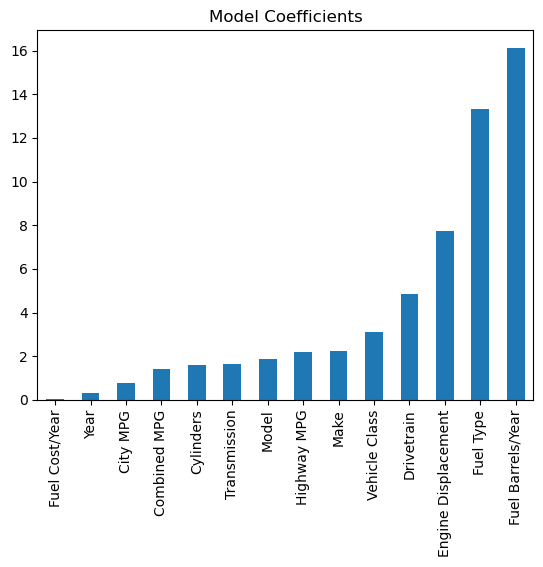

In [49]:
coefs_lr.plot(kind='bar', title='Model Coefficients')

In [50]:
coefs_lr

Fuel Cost/Year          0.049153
Year                    0.303921
City MPG                0.786384
Combined MPG            1.394356
Cylinders               1.597857
Transmission            1.648571
Model                   1.874979
Highway MPG             2.201784
Make                    2.218666
Vehicle Class           3.131824
Drivetrain              4.855827
Engine Displacement     7.745259
Fuel Type              13.325085
Fuel Barrels/Year      16.124913
dtype: float64

In [52]:
#Al final el Fuel Cost/Year  es una feature no interesante?
vehicles2=vehicles.drop(columns=['Fuel Cost/Year'])

notarget2 = vehicles2.drop(columns=['CO2 Emission Grams/Mile'])


X,y = notarget2, vehicles2['CO2 Emission Grams/Mile'] # Create X matrix and y vector from the dataset.

X = np.array(X, dtype=np.float64)

y = np.array(y, dtype=np.float64)

features = notarget2.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1)

lr = LinearRegression() # Create the Linear Regression estimator
lr.fit(X_train, y_train) # Perform the fitting

coefs_lr = pd.Series(np.abs(lr.coef_), features).sort_values()

y_test_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
r2score_train = lr.score(X_train, y_train)
r2score_test = lr.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(lr.intercept_, lr.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: {}'.format(r2score_train))
print('R^2 Score: {}'.format(r2score_test))


Intercept and coefs:
559.1246944935319 [-0.18235716 -0.97720343 -0.18182807  4.68888069  1.49057792  2.49182913
 -1.48490842  2.24635318 -9.68653826 19.9675674   0.82030693 -2.47191712
 -2.28601988]

MSE: 280.84404019486607
R^2 Score: 0.9785343779930148
R^2 Score: 0.9801112322967567


<AxesSubplot:title={'center':'Model Coefficients'}>

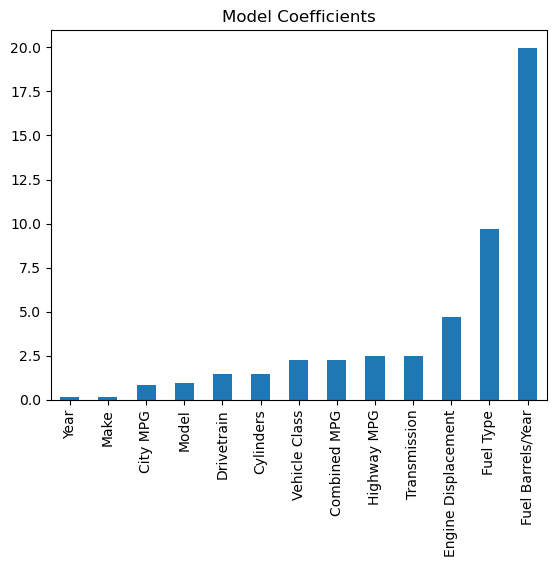

In [53]:
coefs_lr.plot(kind='bar', title='Model Coefficients')

In [54]:
coefs_lr

Year                    0.181828
Make                    0.182357
City MPG                0.820307
Model                   0.977203
Drivetrain              1.484908
Cylinders               1.490578
Vehicle Class           2.246353
Combined MPG            2.286020
Highway MPG             2.471917
Transmission            2.491829
Engine Displacement     4.688881
Fuel Type               9.686538
Fuel Barrels/Year      19.967567
dtype: float64

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*